# Введение в Reflex

Нашей задачей является краткий обзор библиотеки, мне кажется, что повторять их документацию было неправильно, но у них правда там сделано все слишком хорошо, чтобы я совсем ее не использовал. Поэтому я предлагаю сделку: я буду использовать по-больше части код в докладе из документации reflex, но потом я разберу свой сайт, сделанный с помощью reflex

Дисклеймер: у меня не получилось запустить все в коллабе, так что я создал виртуальную среду в pycharm, туда подгрузил reflex - и оттуда же выполнял все операции, сюдя я приложил скриншоты с локального хоста, код, который что-то делает, и мои комментарии

Разминка - создадим пустую страницу


In [ ]:
import reflex as rx

class State(rx.State):
    """The app state"""
    pass

def index()->rx.Component:
    return rx.fragment()


app = rx.App()
app.add_page(index)
app.compile()

*здесь доожен быть скриншот пустой страницы, но поскольку это буквально белый лист, то пропустим*

Такс, class State наследуется от rx.State и туда можно передовать как переменные, так и функции (методы), которые помогут управлять приложением и реагировать на действия пользователя.
Аналогично функция index() - относится к части фронтенда, она будет отображать нашу страницу, пока она возвращает ничего

Напишем что-нибудь, что пока не будет менять значения, просто продемонстрируем основные возможности заголовков, текста, кнопок, изображений и прочего.




In [ ]:
import reflex as rx
import plotly.express as px

df = px.data.gapminder().query("country=='Canada'")
fig = px.line(
    df,
    x="year",
    y="lifeExp",
    title="Life expectancy in Canada",
)

class State(rx.State):
    """The app state"""
    pass

def index() -> rx.Component:
    return rx.vstack(
        rx.heading("Базовая страница в Reflex для текста, кнопок, картинок и прочего", font_size="5em"),
        rx.text("Итак, вот что можно сделать с текстом",font_size="2em"),
        rx.text("Hello World!", as_="mark"),
        rx.markdown(r"$ \int_a^b x^2 dx $"),
        rx.box(
            "ТЕКСТ В БЛОКЕ",
            bg="lightblue",
            border_radius="lg",
            width="80%",
        ),
        rx.circle(
            rx.vstack(rx.text("КРУГ")),
            border_width="thick",
            border_color="orange",
            padding="1em",
        ),
        rx.table_container(
            rx.table(
                headers=["Дата", "Предмет", "Контроль"],
                rows=[
                    ("13.12.2023", "Матан", "Коллоквиум"),
                    ("05.12.2023", "ТВиМС", "Минимум"),
                    ("11.12.2023", "Python_2", "Проект промежуточный"),
                ],
                variant="striped",
            )
        ),
        rx.plotly(data=fig, height="400px"),
        rx.accordion(
            rx.accordion_item(
                rx.accordion_button(
                    rx.heading("Список дел"),
                    rx.accordion_icon(),
                ),
                rx.accordion_panel(
                    rx.text(
                        "Заботать ТВиМС"
                    ),
                    rx.text(
                        "Посмотреть Оппенгеймера"
                    )
                ),
            ),
            allow_toggle=True,
            width="100%",
        ),
        rx.popover(
            rx.popover_trigger(rx.button("Так, может мы что-нибудь забыли?")),
            rx.popover_content(
                rx.popover_header("Да, конечно"),
                rx.popover_body("Где картинки?"),
                rx.popover_footer(rx.text("Давай добавляй")),
                rx.popover_close_button(),
            ),
        ),

        rx.video(
            url="https://www.youtube.com/embed/9bZkp7q19f0",
            width="400px",
            height="auto",
        ),
        rx.image(
            src="/hse.svg", width="100px", height="auto"
        ),  # docs reflex
        rx.link(
            "Донат",
            href="https://youtu.be/dQw4w9WgXcQ?feature=shared",
            color="rgb(107,99,246)",
        ),
        rx.checkbox("Я все прочитал!"),
        rx.alert(
            rx.alert_icon(),
            rx.alert_title("Ну и молодец"),
            status="success",
        ),
    )

app = rx.App()
app.add_page(index)
app.compile()


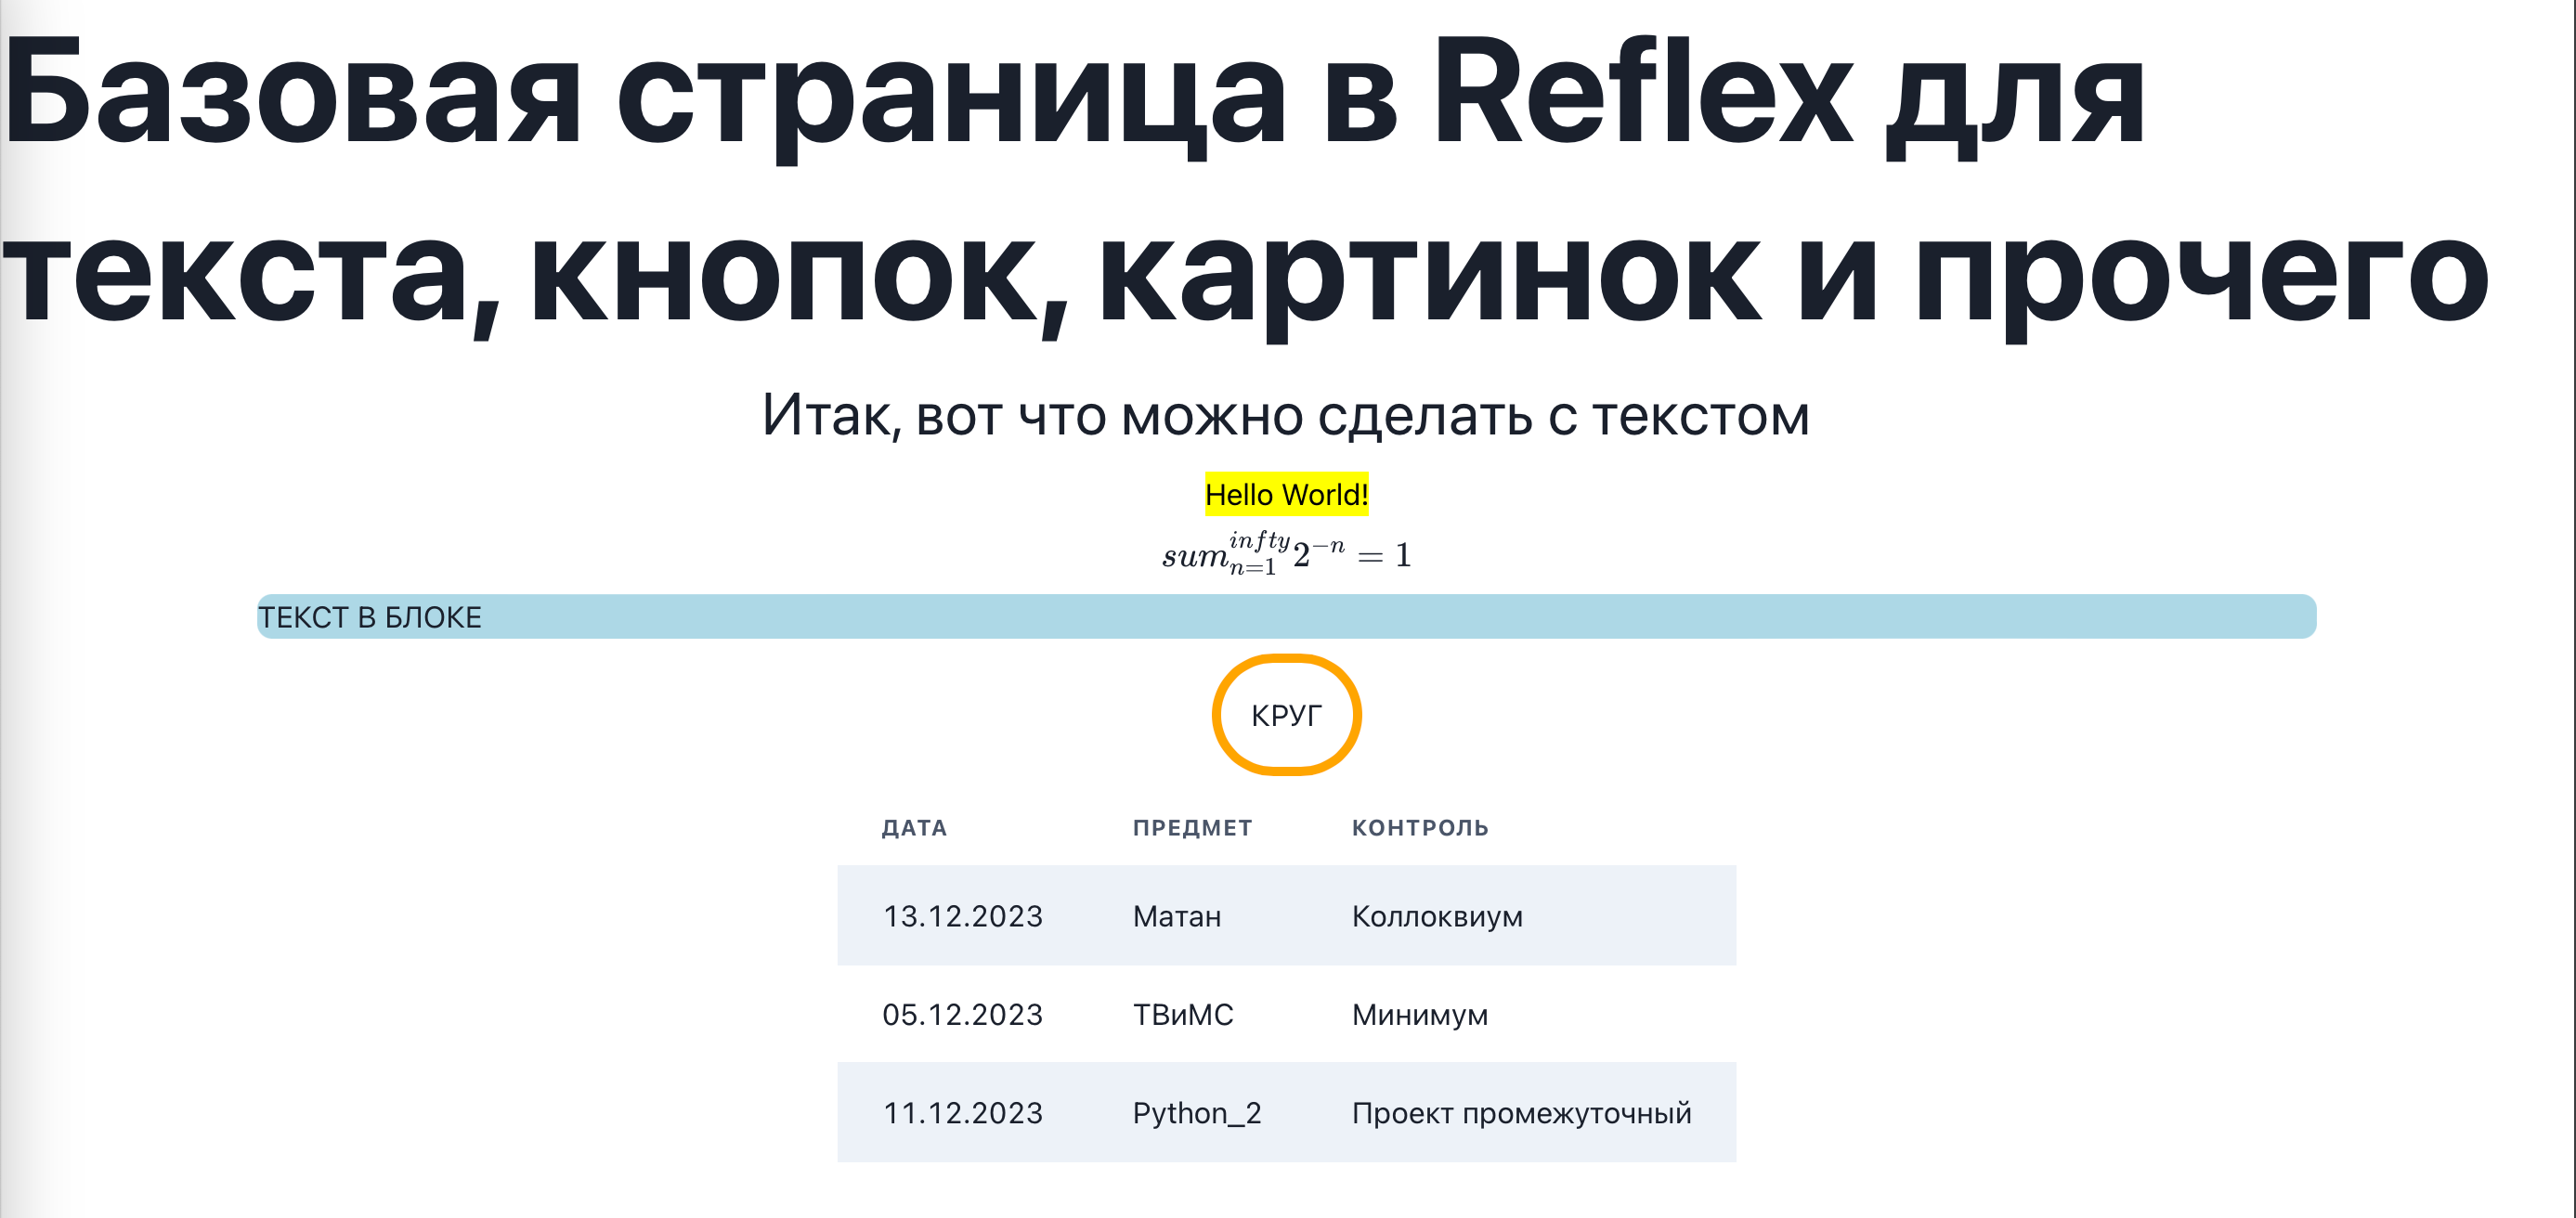

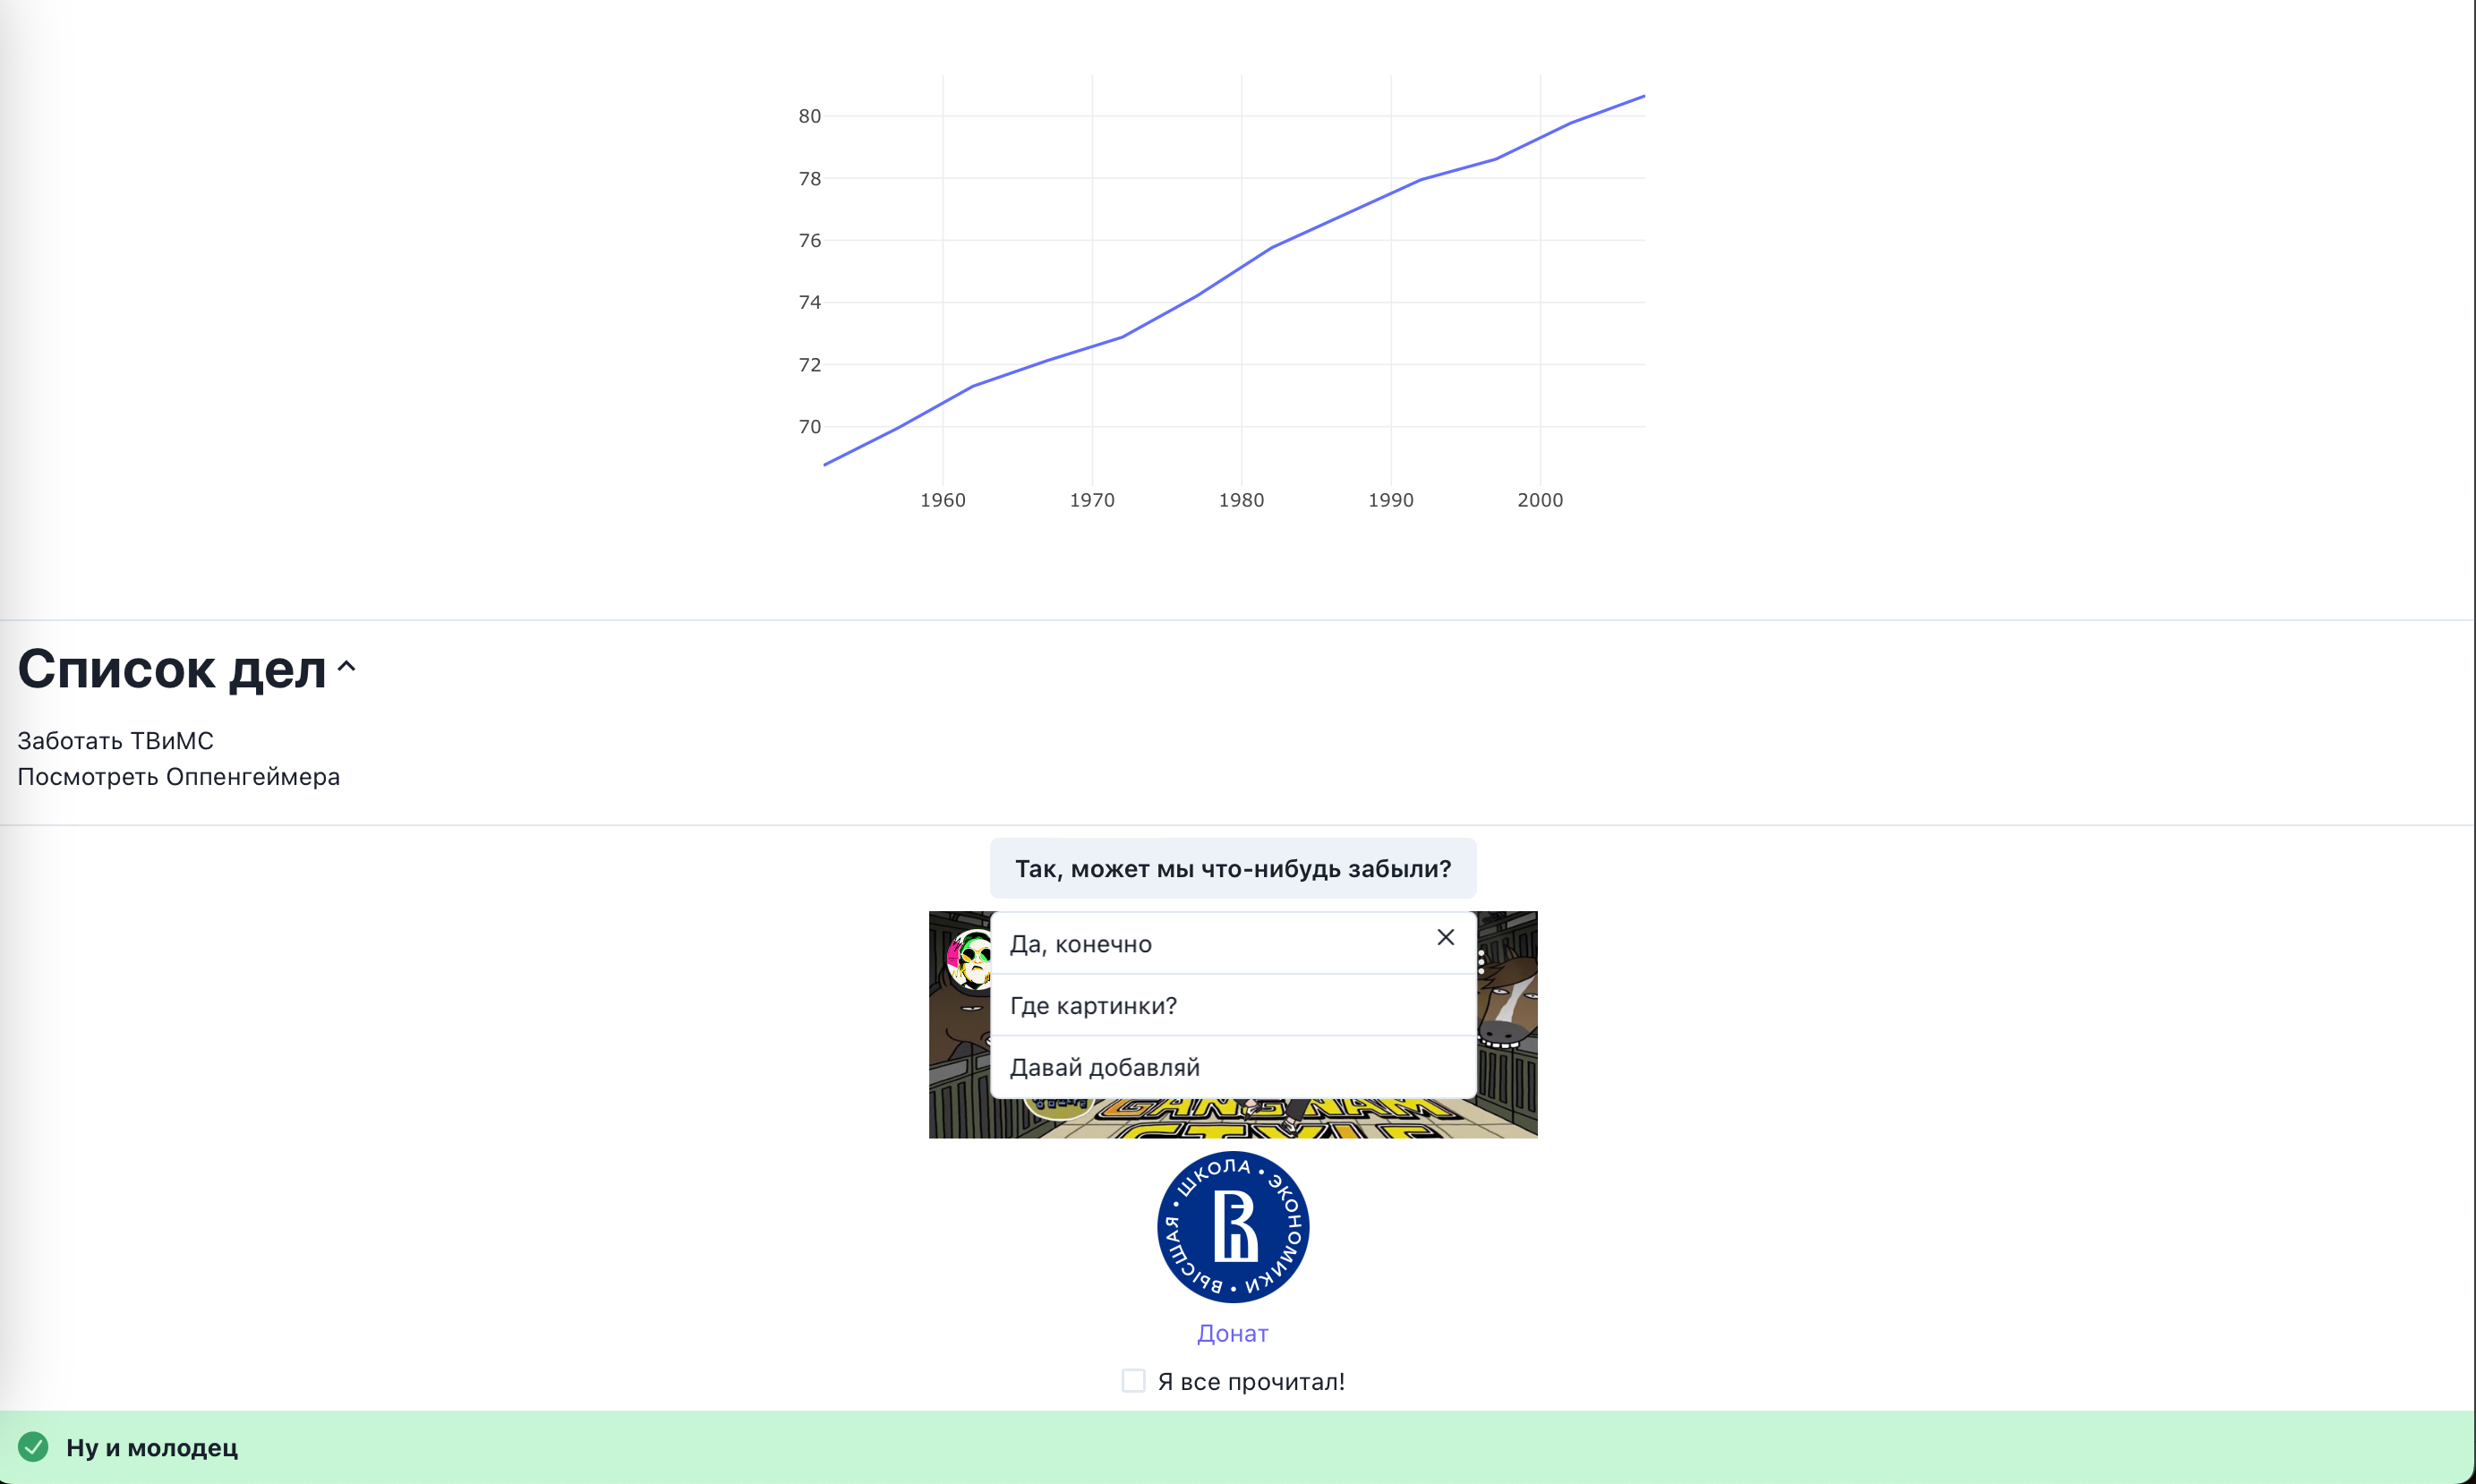

Почти все я брал напрямую отсюда: [Component Library](https://reflex.dev/docs/library/)

Мы поняли, что в Reflex есть достаточно широкий спектор для работы с текстом, конпками, списками, картинками и прочем

Отлично, теперь сделаем несколько страниц, чтобы разные страницы отвечали за разные части

Начнем с простого, возьмем идею с документации и с помощью декоратора @rx.page() создадим с помощью него несколько страниц

In [ ]:
import reflex as rx

class State(rx.State):
    pass

@rx.page(route="/")
def home():
    return rx.vstack(
        rx.heading("Главная Страница"),
        rx.link("Примеры Проектов", href="/projects"),
        rx.link("Мемы", href="/memes"),
        rx.link("Об Авторе", href="/author")
    )

@rx.page(route="/projects")
def projects():
    return rx.vstack(
        rx.heading("Примеры Проектов на Reflex"),
        rx.text("Здесь будут примеры проектов..."),
        rx.link("Вернуться на главную", href="/")
    )

@rx.page(route="/memes")
def memes():
    return rx.vstack(
        rx.heading("Страница с Мемами"),
        rx.text("Здесь будут мемы..."),
        rx.link("Вернуться на главную", href="/")
    )

@rx.page(route="/author")
def author():
    return rx.vstack(
        rx.heading("Я"),
        rx.image(
            src="/Влад аватарка фото.jpg", width="100px", height="auto"
        ),
        rx.text("Информация обо мне"),
        rx.link("Вернуться на главную", href="/")
    )

app = rx.App()
app.compile()



Сделал коллаж в PP

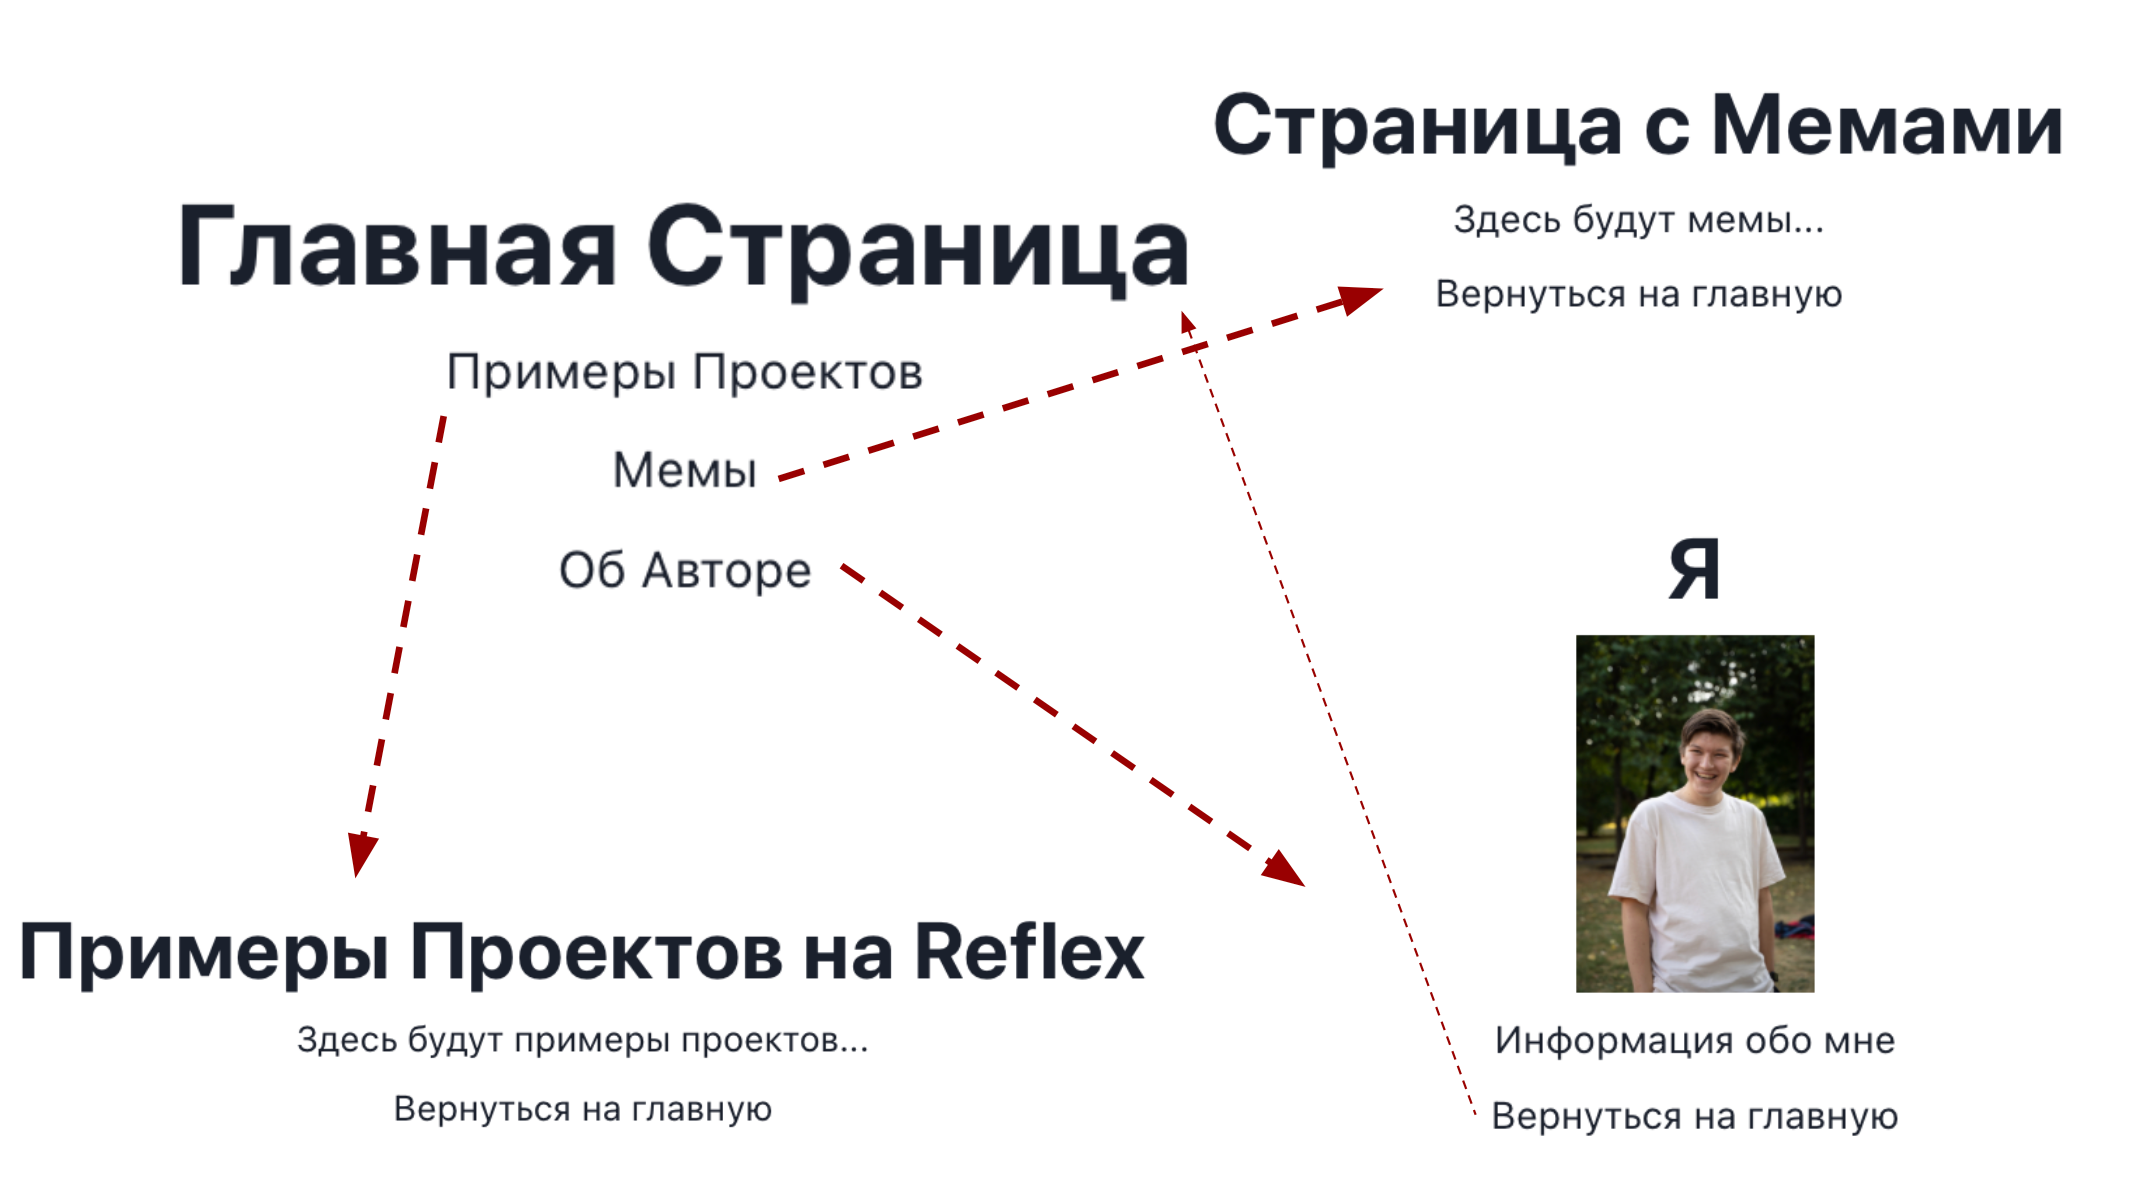

Теперь можно начать демонстрировать прикольные возможности проектов, которые по большей части я возьму из документации, немного изменив их

In [ ]:
import reflex as rx
import random
from datetime import datetime
from googletrans import Translator
from reflex.base import Base
from .langs import langs

trans = Translator()


class Message(Base):
    original_text: str
    text: str
    created_at: str
    to_lang: str


class State(rx.State):
    # TODO_project:
    items = ["Поспать", "Еще поспать", "Пойти на пары"]
    new_item: str
    invalid_item: bool = False

    def add_item(self, form_data: dict[str, str]):
        new_item = form_data.pop("new_item")
        if not new_item:
            self.invalid_item = True
            return
        self.items.append(new_item)
        self.invalid_item = False
        return rx.set_value("new_item", "")

    def finish_item(self, item: str):
        self.items.pop(self.items.index(item))

    # Counter_project:
    count = 0

    def increment(self):
        """Increment the count."""
        self.count += 1

    def decrement(self):
        """Decrement the count."""
        self.count -= 1

    def random(self):
        """Randomize the count."""
        self.count = random.randint(0, 100)

    # Translator_project:
    text: str = ""
    messages: list[Message] = []
    lang: str = "Zulu"

    @rx.var
    def output(self) -> str:
        if not self.text.strip():
            return "Перевод"
        translated = trans.translate(self.text, dest=self.lang)
        return translated.text

    def post(self):
        self.messages = [
                            Message(
                                original_text=self.text,
                                text=self.output,
                                created_at=datetime.now().strftime("%B %d, %Y %I:%M %p"),
                                to_lang=self.lang,
                            )
                        ] + self.messages

    # Swears_project:
    swears = ["Выблядок", "Хитровыебанный", "Пидорас", "Хуй", "Пиздабол", "Распиздяй", "Сука", "Дурачок", "Мудачок", "Черт", "Шайтан", "Мудень", "Хабал", "Пыня", "Околотень", "Невеглас"]
    current_swear="Выблядок"

    @rx.var
    def random_swear(self) -> str:
        return self.current_swear

    def generate_swear(self):
        self.current_swear = random.choice(self.swears)

@rx.page(route="/")
def home():
    return rx.vstack(
        rx.heading("Главная Страница"),
        rx.link("Проекты", href="/projects"),
        rx.link("Мемы", href="/memes"),
        rx.link("Об Авторе", href="/author")
    )


@rx.page(route="/projects")
def projects():
    return rx.vstack(
        rx.heading("Проекты на Reflex"),
        rx.link("Счётчик", href="/counter"),
        rx.link("Переводчик", href="/translator"),
        rx.link("Список дел", href="/todo"),
        rx.link("Генератор Ругательств", href="/swear-generator"),
        rx.link("Вернуться на главную", href="/")
    )


@rx.page(route="/memes")
def memes():
    return rx.vstack(
        rx.heading("Страница с Мемами"),
        rx.text("Мем_pepe"),
        rx.image(src="/мем_2.jpg", alt="Фото автора", width=300),
        rx.text("Мем_Стрелков"),
        rx.image(src="/мем_1.jpg", alt="Фото автора", width=400),
        rx.text("Мем_enjoier"),
        rx.image(src="/SCR-20231128-cwny.jpeg", alt="Фото автора", width=400),
        rx.text("Мем_4"),
        rx.circular_progress(
            rx.circular_progress_label(
                "", color="rgb(107,99,246)"
            ),
            is_indeterminate=True,
        ), # Да, это СКАМ
        rx.link("Вернуться на главную", href="/")
    )


@rx.page(route="/author")
def author():
    return rx.container(
        rx.responsive_grid(
            rx.box(
                rx.image(src="/Влад аватарка фото.jpg", alt="Фото автора", width=200),
                height="20em",
                width="12em",
                bg="#f0f0f0",
                display="flex",
                justify_content="center",
                align_items="center"
            ),
            rx.box(
                rx.vstack(
                    rx.text("Семенов Влад", font_size="1.2em", font_weight="bold", text_align="center"),
                    rx.text("ВШЭ ЭАД", font_size="1em", text_align="center"),
                    rx.text("2 курс", font_size="1em", text_align="center")
                ),
                height="10em",
                width="10em",
                bg="lightblue",
                display="flex",
                justify_content="center",
                align_items="center"
            ),
            rx.box(
                rx.vstack(
                    rx.text("Любимые мемы", font_size="1.2em", font_weight="bold", text_align="center"),
                    rx.ordered_list(
                        rx.list_item("Грустный пепе"),
                        rx.list_item("Мем со Стрелковым и мобилизацией"),
                        rx.list_item("Мем с enjoyer and gigachad"),
                        font_size="1em"
                    )
                ),
                height="10em",
                width="10em",
                bg="lightpurple",
                display="flex",
                justify_content="center",
                align_items="center"
            ),
            rx.box(
                rx.link("Главное меню", href="/", font_size="1.2em", font_weight="bold"),
                height="7em",
                width="7em",
                bg="tomato",
                display="flex",
                justify_content="center",
                align_items="center"
            ),
            columns=[2],
            spacing="4",
        ),
        padding="2em",
        bg="#f0f0f0",
        border_radius="1em",
        shadow="lg",
        font_family="'Segoe UI', Tahoma, Geneva, Verdana, sans-serif"  # Улучшил шрифт
    )

@rx.page(route="/counter")
def counter():
    return rx.center(
        rx.vstack(
            rx.heading(State.count),
            rx.hstack(
                rx.button("Decrement", on_click=State.decrement, color_scheme="red"),
                rx.button(
                    "Randomize",
                    on_click=State.random,
                    background_image="linear-gradient(90deg, rgba(255,0,0,1) 0%, rgba(0,176,34,1) 100%)",
                    color="white",
                ),
                rx.button("Increment", on_click=State.increment, color_scheme="green"),
            ),
            rx.vstack(rx.link("Вернуться на главную", href="/")),
            padding="1em",
            bg="#ededed",
            border_radius="1em",
            box_shadow="lg",
        ),
        padding_y="5em",
        font_size="2em",
        text_align="center",
    )


# Translation_functions
def header():
    """Basic instructions to get started."""
    return rx.box(
        rx.text("Translator 🗺", font_size="2rem"),
        rx.text(
            "Translate things and post them as messages!",
            margin_top="0.5rem",
            color="#666",
        ),
    )


def down_arrow():
    return rx.vstack(
        rx.icon(
            tag="arrow_down",
            color="#666",
        )
    )


def text_box(text):
    return rx.text(
        text,
        background_color="#fff",
        padding="1rem",
        border_radius="8px",
    )


def message(message):
    return rx.box(
        rx.vstack(
            text_box(message.original_text),
            down_arrow(),
            text_box(message.text),
            rx.box(
                rx.text(message.to_lang),
                rx.text(" · ", margin_x="0.3rem"),
                rx.text(message.created_at),
                display="flex",
                font_size="0.8rem",
                color="#666",
            ),
            spacing="0.3rem",
            align_items="left",
        ),
        background_color="#f5f5f5",
        padding="1rem",
        border_radius="8px",
    )


def smallcaps(text, **kwargs):
    return rx.text(
        text,
        font_size="0.7rem",
        font_weight="bold",
        text_transform="uppercase",
        letter_spacing="0.05rem",
        **kwargs,
    )


def output():
    return rx.box(
        rx.box(
            smallcaps(
                "Output",
                color="#aeaeaf",
                background_color="white",
                padding_x="0.1rem",
            ),
            position="absolute",
            top="-0.5rem",
        ),
        rx.text(State.output),
        padding="1rem",
        border="1px solid #eaeaef",
        margin_top="1rem",
        border_radius="8px",
        position="relative",
    )


@rx.page(route="/translator")
def translator():
    return rx.container(
        header(),
        rx.input(
            placeholder="Text to translate",
            on_blur=State.set_text,
            margin_top="1rem",
            border_color="#eaeaef",
        ),
        rx.select(
            list(langs.keys()),
            value=State.lang,
            placeholder="Select a language",
            on_change=State.set_lang,
            margin_top="1rem",
        ),
        output(),
        rx.button("Post", on_click=State.post, margin_top="1rem"),
        rx.vstack(
            rx.foreach(State.messages, message),
            margin_top="2rem",
            spacing="1rem",
            align_items="left",
        ), rx.link("Вернуться к проектам", href="/projects"),
        padding="2rem",
        max_width="600px",
    )


# TODO_functions
def todo_item(item: rx.Var[str]) -> rx.Component:
    return rx.list_item(
        rx.hstack(
            rx.button(
                on_click=lambda: State.finish_item(item),
                height="1.5em",
                background_color="white",
                border="1px solid blue",
            ),
            rx.text(item, font_size="1.25em"),
        )
    )


def todo_list() -> rx.Component:
    return rx.ordered_list(
        rx.foreach(State.items, lambda item: todo_item(item)),
    )


def new_item() -> rx.Component:
    return rx.form(
        rx.input(
            id="new_item",
            placeholder="Add a todo...",
            bg="white",
            is_invalid=State.invalid_item,
        ),
        rx.center(
            rx.button("Add", type_="submit", bg="white"),
        ),
        on_submit=State.add_item,
    )


@rx.page(route="/todo")
def todo():
    return rx.container(
        rx.vstack(
            rx.heading("Todos"),
            new_item(),
            rx.divider(),
            todo_list(),
            bg="#ededed",
            margin="5em",
            padding="1em",
            border_radius="0.5em",
            shadow="lg",
        ),
        rx.link("Вернуться к проектам", href="/projects")
    )



@rx.page(route="/swear-generator")
def swear_generator():
    return rx.vstack(
        rx.heading("Испытай удачу"),
        rx.text(f"Батенька, да вы {State.random_swear}!"),
        rx.button("Тебе повезет", on_click=State.generate_swear),
        rx.link("Вернуться к проектам", href="/projects")
    )


app = rx.App(state=State)
app.add_page(home)
app.add_page(projects)
app.add_page(memes)
app.add_page(author)
app.add_page(counter)
app.add_page(translator)
app.add_page(todo)
app.add_page(swear_generator)
app.compile()


Давайте теперь продемонстрируем что у нас получилось, когда мы все это заполнили, опять же использовал PP

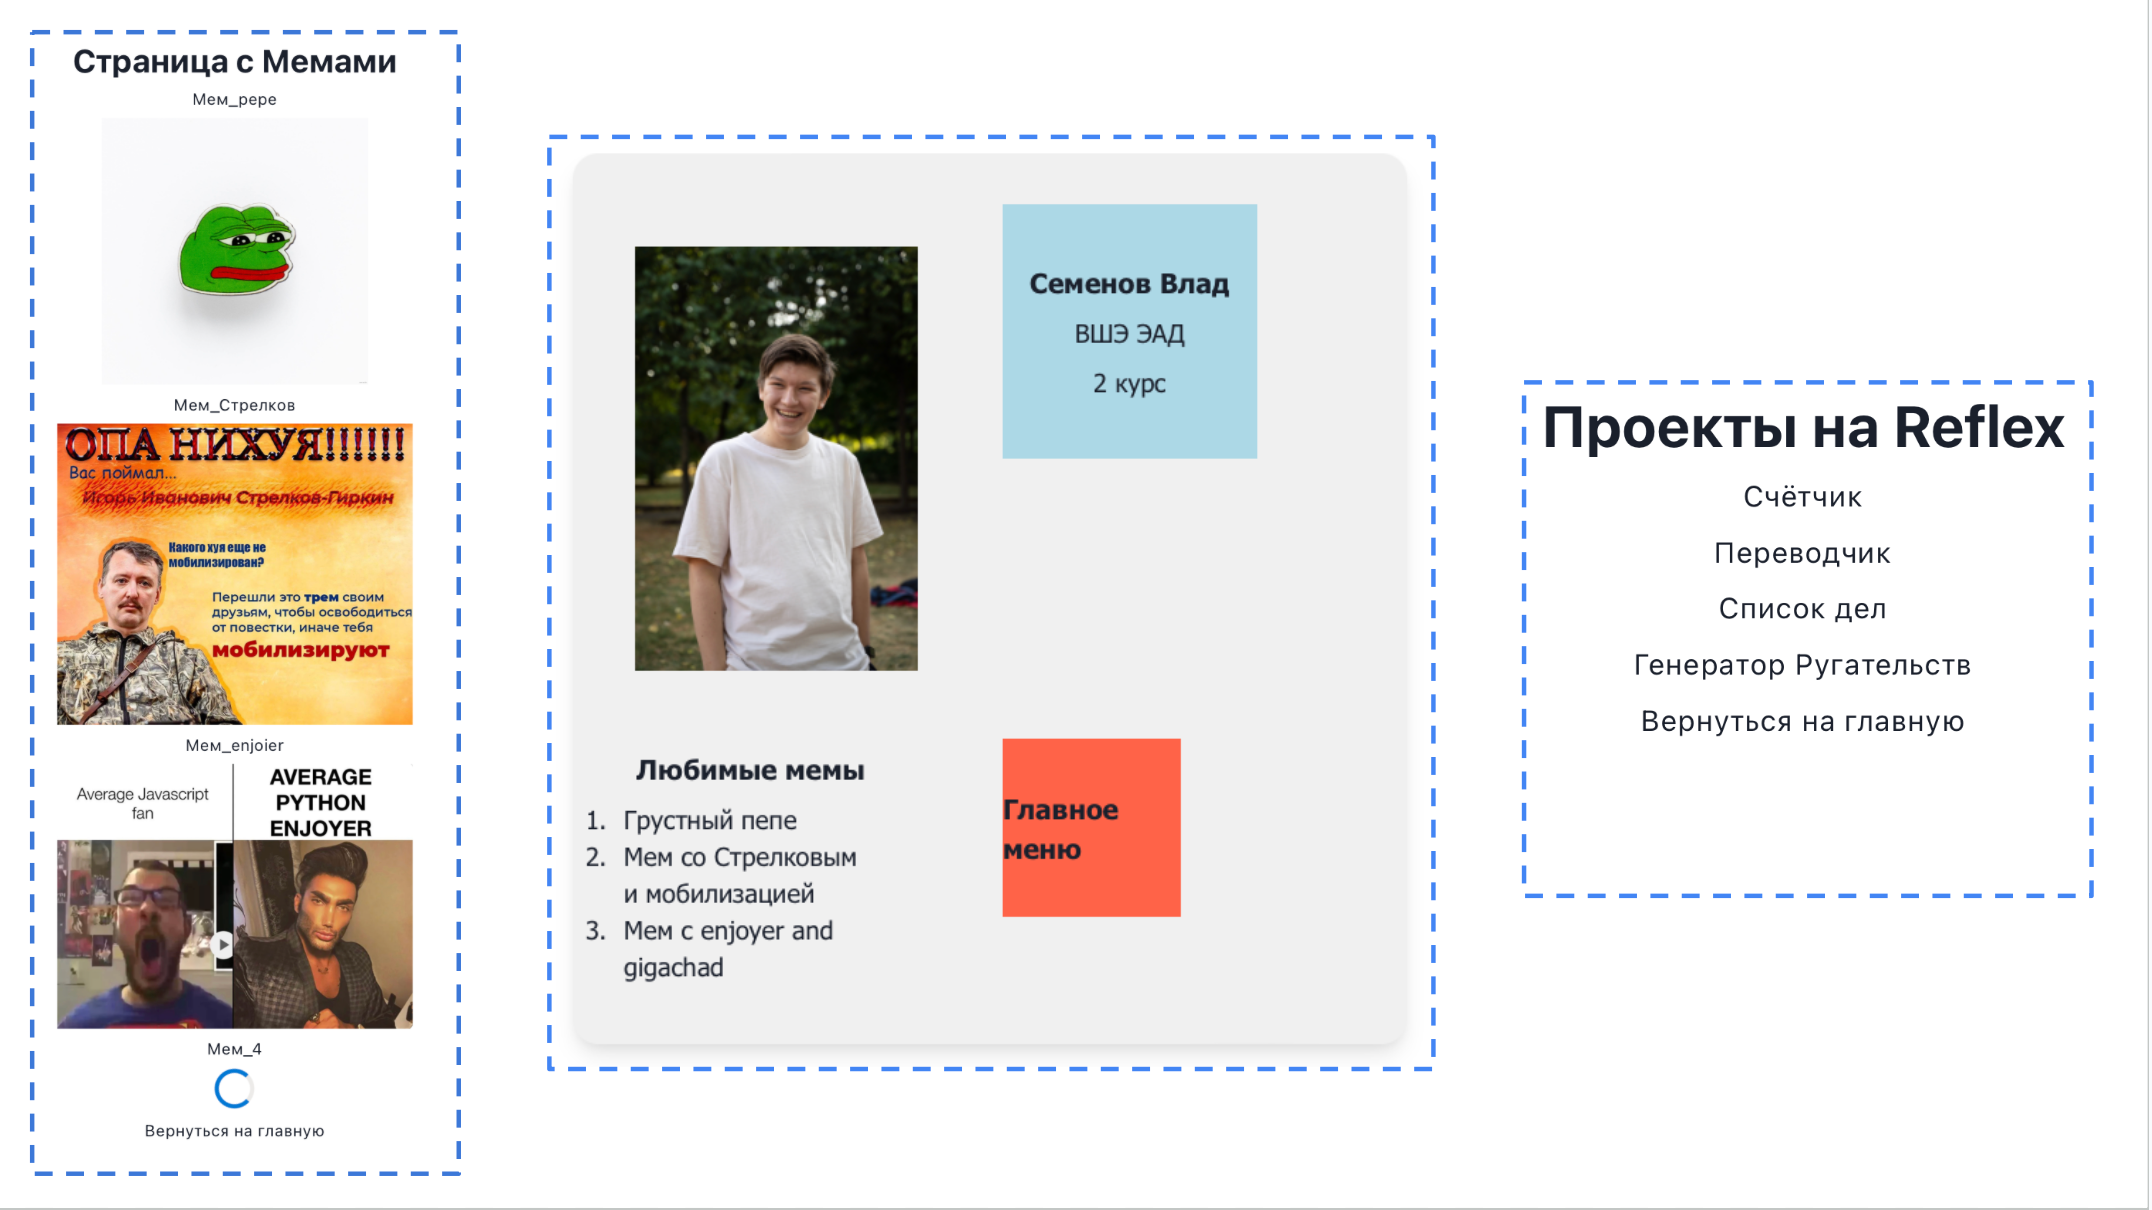

Теперь перейдем к проектам и объясним как они работают

Сначала расскажем про два самых простых проекта counter и swear
То есть простой каунтер и просто генератор ругательств

**Counter** позволяет увеличивать, уменьшать или устаннавливать случайное значение счётчика. В коде используется класс State с переменной count, которая хранит текущее значение счётчика. Функции increment, decrement и random измееняют значение count. При нажатии на кнопку вызывается нужная функция

**Swear generator** генерирует случайное ругательство из списка. В коде используется список swears с ругательствами и переменная current_swear для хранения текущего ругательства (по умолчанию там первый элемент листа). Функция generate_swear выбирает случайное ругательство из списка. На странице отображается текущее ругательство и кнопка для генерации новог.

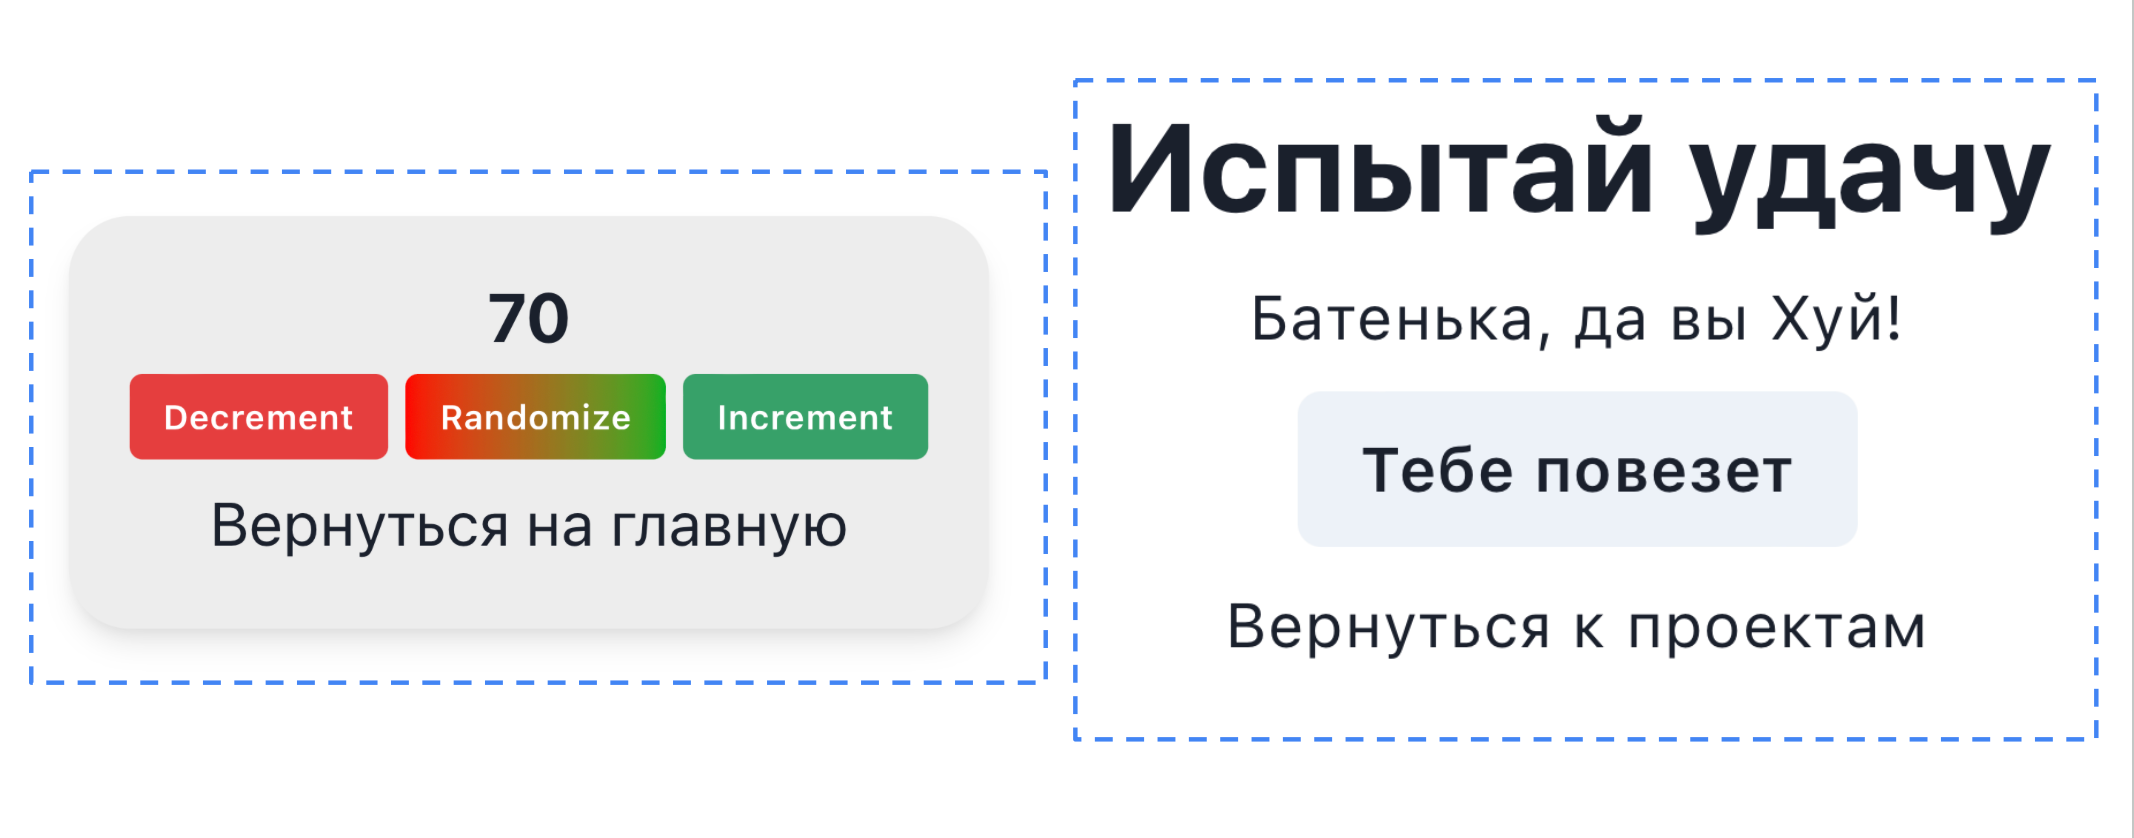

**TODO**

В коде используется класс State, который содержит список items для хранения задач. Этот список представляет собой массив строк, где каждая строка - это отдельная задача.

Добавление задачи: Функция add_item обрабатывает добавление новой задачи. Она принимает данные формы, извлекает значение новой задачи (new_item ). Если значение не пустое, оно добавляется в список items.
Удаление задачи: Функция finish_item удаляет задачу из списка. Она принимает строку, представляющую задачу, и удаляет её из списка items, используя метод pop.

На странице отображается форма для ввода новой задачи и список текущих задач. Форма включает в себя текстовое поле для ввода и кнопку для добавления задачи. При отправке формы вызывается функция add_item. Каждая задача в списке сопровождается кнопкой для её удаления, при нажатии на которую вызывается функция finish_item.



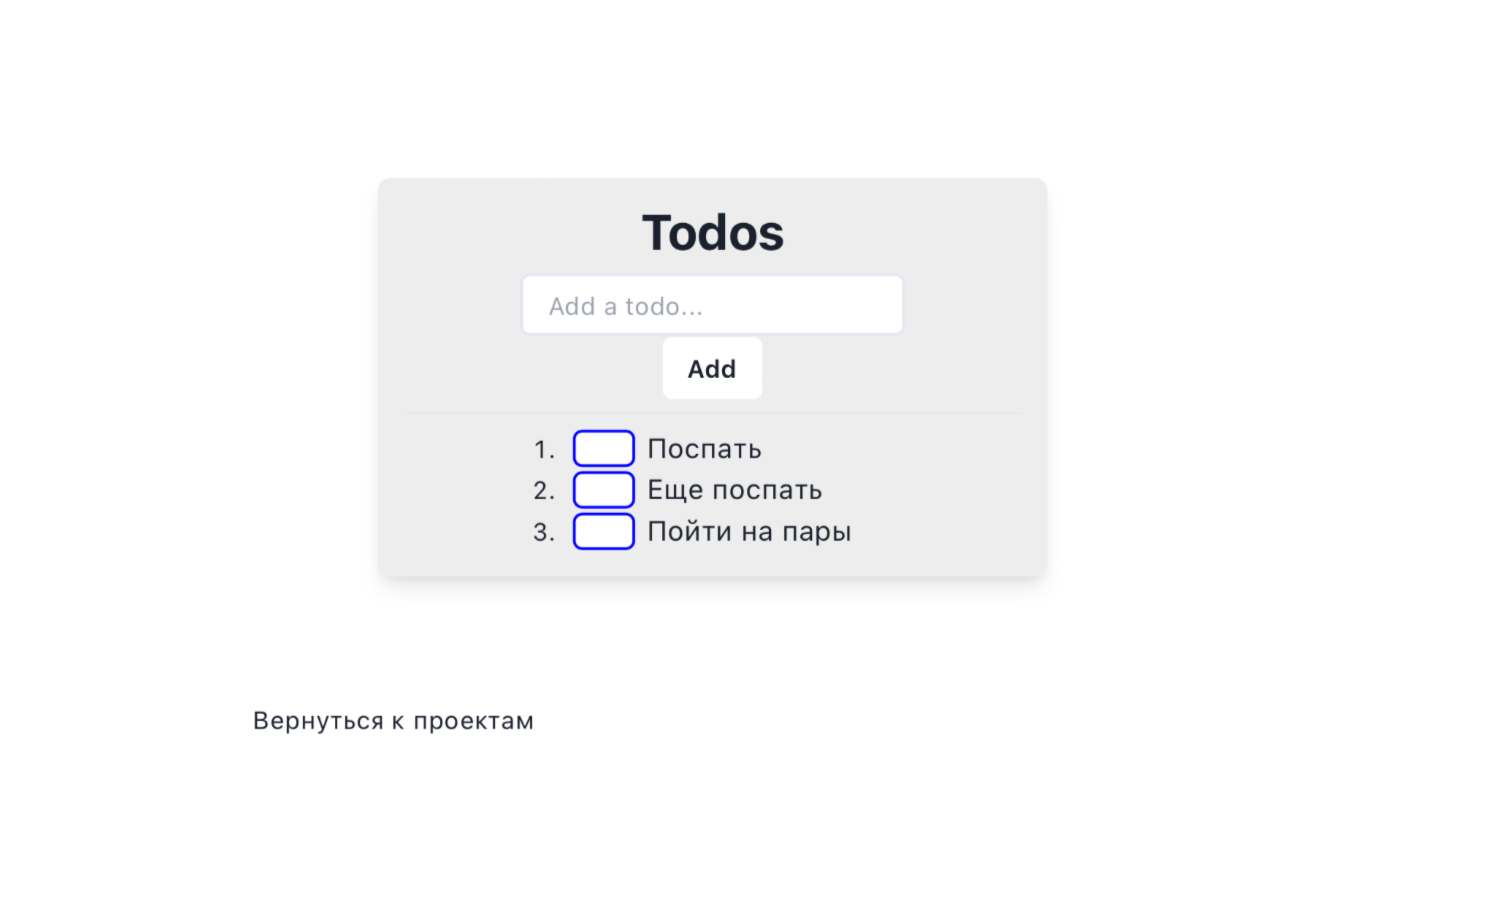

**Translator**

Переменные:


*   text: Хранит вводимый пользователем текст.
*   lang: Хранит выбранный пользователем язык перевода.
*   messages: Список, содержащий историю переведённых сообщений.


Функция output: при изменении text или lang она использует библиотеку googletrans для перевода текста, хранящегося в переменной text, на язык, указанный в переменной lang. результат перевода возвращается функцией и отображается на странице.

Функция post: при нажатии кнопки "Post", эта функция вызывается для добавления текущего перевода в список messages. Каждое сообщение в этом списке содержит оригинальный текст, переведённый текст, дату создания и целевой язык перевода.

Когда пользователь вводит текст и выбирает язык, функция output активируется, обеспечивая мгновенный перевод. Нажав на кнопку "Post" - добавляем в историю сообщений для сохранения истории

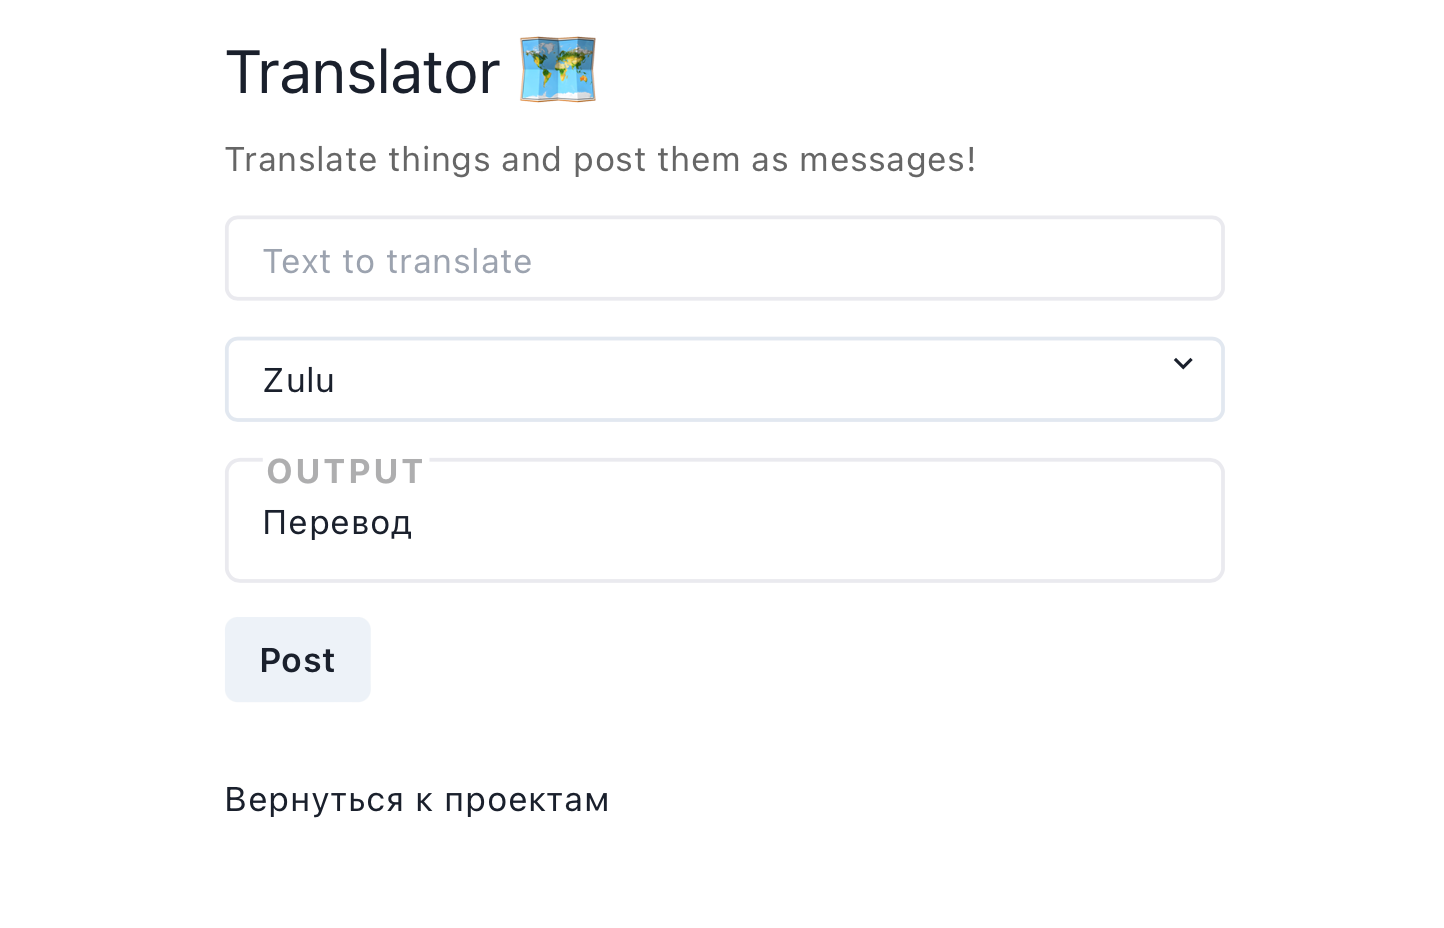

Класнно, осталось только сделать все это красивым, в этом нам поможет: Local Stylesheets

Если здесь больше ничего нет, то я не успел сделать нормальный CSS в style.py

Что-то еще можно было сказать про hosting, однако эта функция есть у них только в Beta тесте, доступа к которому у меня нет, а хостить самому не хочется (для нормальной работы требуется арендовать сервер (какие-то картинки у нас же есть, а значит и хранить надо).